In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
gdp = ctrl.Antecedent(np.arange(0, 60100), 'Gross Domestic Product')


In [3]:
gdp['low'] = fuzz.trapmf(gdp.universe, [0, 6000, 10000, 13000])
gdp['medium'] = fuzz.trapmf(gdp.universe, [10000, 14000, 20000, 24000])
gdp['high'] = fuzz.trapmf(gdp.universe, [20000, 25000, 100000, 120000])

c:\Users\TuanBao\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


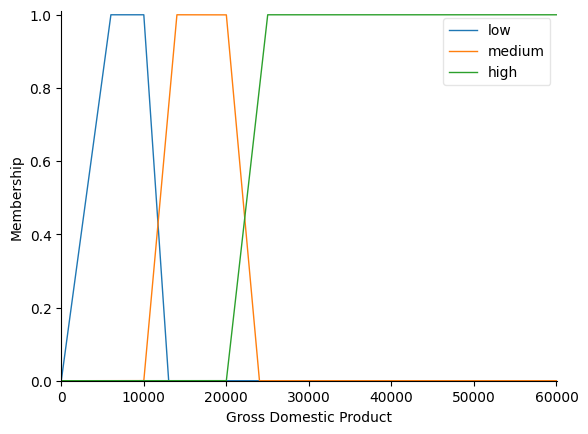

In [4]:
gdp.view()

In [5]:
plt.show(block=True)

In [6]:
unemp = ctrl.Antecedent(np.arange(0, 16), 'Unemployment Rate')


In [7]:
unemp['low'] = fuzz.trapmf(unemp.universe, [0, 2, 3, 5])
unemp['medium'] = fuzz.trapmf(unemp.universe, [3, 6, 7, 10])
unemp['high'] = fuzz.trapmf(unemp.universe, [8, 10, 15, 30])

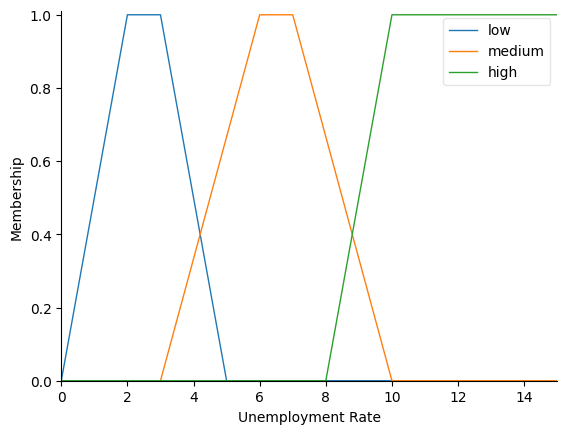

In [8]:
unemp.view()

In [9]:
infla = ctrl.Antecedent(np.arange(0, 21), 'Inflation Rate')

In [10]:
infla['low'] = fuzz.trapmf(infla.universe, [-20, 0, 3, 4])
infla['medium'] = fuzz.trapmf(infla.universe, [3, 4, 8, 10])
infla['high'] = fuzz.trapmf(infla.universe, [8, 10, 20, 1000])

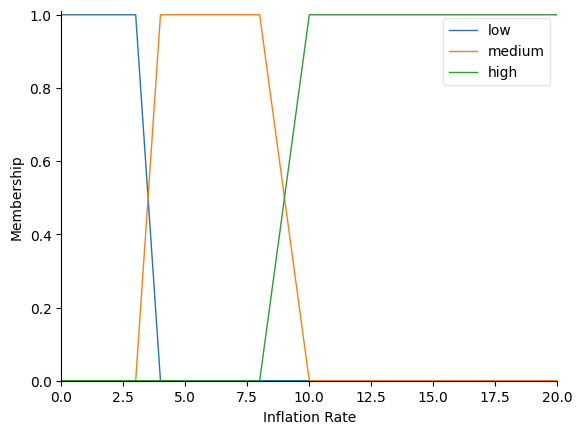

In [11]:
infla.view()

In [12]:
# Consequents
cmd = ctrl.Consequent(np.arange(0, 21), 'command')

In [13]:
# Command memberships (lệnh)
cmd['low'] = fuzz.trimf(cmd.universe, [0, 4, 8])
cmd['medium'] = fuzz.trimf(cmd.universe, [6, 10, 14])
cmd['high'] = fuzz.trimf(cmd.universe, [12, 16, 20])

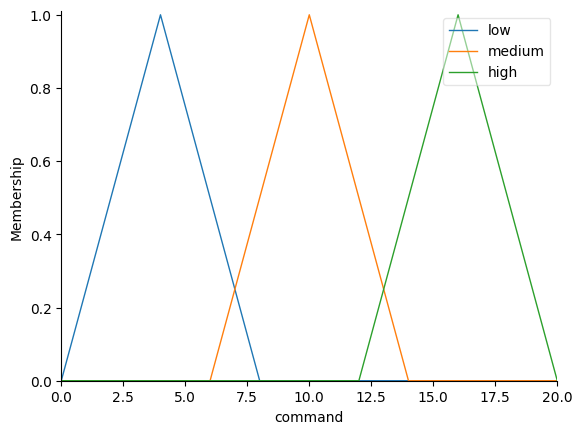

In [14]:
cmd.view()

In [15]:
# Rule system (Xây dựng luật khi kinh tế phát triển kém)
rule1 = ctrl.Rule(
    (gdp['low'] & unemp['low'] & infla['high']) |
    (gdp['low'] & unemp['medium'] & infla['medium']) |
    (gdp['low'] & unemp['medium'] & infla['high']) |
    (gdp['low'] & unemp['high'] & infla['low']) |
    (gdp['low'] & unemp['high'] & infla['medium']) |
    (gdp['low'] & unemp['high'] & infla['high']) |
    (gdp['medium'] & unemp['medium'] & infla['high']) |
    (gdp['medium'] & unemp['high'] & infla['medium']) |
    (gdp['medium'] & unemp['high'] & infla['high']), 
    cmd['low']
)


In [16]:
# Rule system (Xây dựng luật khi kinh tế phát triển trung bình)
rule2 = ctrl.Rule(
    (gdp['low'] & unemp['low'] & infla['low']) |
    (gdp['low'] & unemp['low'] & infla['medium']) |
    (gdp['low'] & unemp['medium'] & infla['low']) |
    (gdp['medium'] & unemp['low'] & infla['medium']) |
    (gdp['medium'] & unemp['low'] & infla['high']) |
    (gdp['medium'] & unemp['medium'] & infla['low']) |
    (gdp['medium'] & unemp['medium'] & infla['medium']) |
    (gdp['medium'] & unemp['high'] & infla['low']) |
    (gdp['high'] & unemp['low'] & infla['high']) |
    (gdp['high'] & unemp['medium'] & infla['medium']) |
    (gdp['high'] & unemp['medium'] & infla['high']) |
    (gdp['high'] & unemp['high'] & infla['low']) |
    (gdp['high'] & unemp['high'] & infla['medium']) |
    (gdp['high'] & unemp['high'] & infla['high']),
    cmd['medium']
)

In [17]:
# Rule system (Xây dựng luật khi kinh tế phát triển cao)
# Rules for warming up
rule3 = ctrl.Rule(
    (gdp['medium'] & unemp['low'] & infla['low']) |
    (gdp['high'] & unemp['low'] & infla['low']) |
    (gdp['high'] & unemp['low'] & infla['medium']) |
    (gdp['high'] & unemp['medium'] & infla['low']),
    cmd['high']
)


In [18]:
# Control System Creation and Simulation
cmd_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cmd_output = ctrl.ControlSystemSimulation(cmd_ctrl)

In [19]:
gdp_value = float(input("Enter GDP : "))
unemp_value = float(input("Enter Unemployment Rate : "))
infla_value = float(input("Enter Inflation Rate : "))

cmd_output.input['Gross Domestic Product'] = gdp_value
cmd_output.input['Unemployment Rate'] = unemp_value
cmd_output.input['Inflation Rate'] = infla_value

cmd_output.compute()

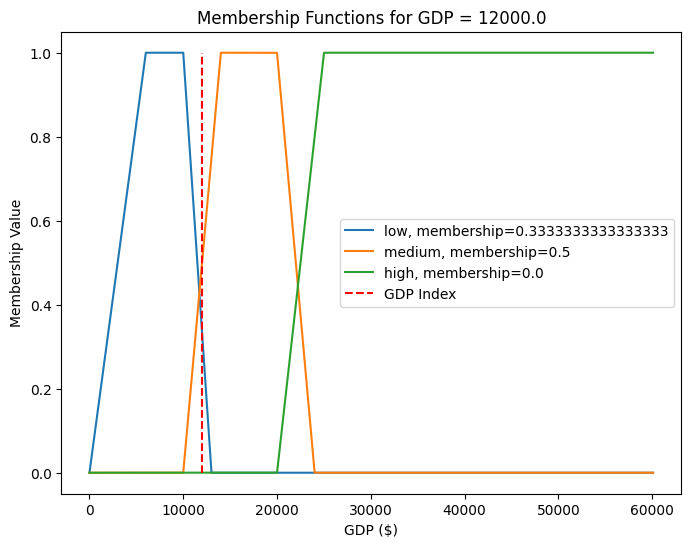

In [20]:
# Hiển thị hàm thành viên cho từng tập mờ của chỉ số GDP 
plt.figure(figsize=(8, 6))

# Hàm thành viên 'low'
gdp_membership_low = fuzz.interp_membership(gdp.universe, gdp['low'].mf, gdp_value)
plt.plot(gdp.universe, gdp['low'].mf, label = 'low, membership=' + str(gdp_membership_low))

# Hàm thành viên 'medium'
gdp_membership_medium = fuzz.interp_membership(gdp.universe, gdp['medium'].mf, gdp_value)
plt.plot(gdp.universe, gdp['medium'].mf, label = 'medium, membership=' + str(gdp_membership_medium))

# Hàm thành viên 'high'
gdp_membership_high = fuzz.interp_membership(gdp.universe, gdp['high'].mf, gdp_value)
plt.plot(gdp.universe, gdp['high'].mf, label = 'high, membership=' + str(gdp_membership_high))

# Đánh dấu vị trí chỉ số trên đồ thị
plt.vlines(x=gdp_value, ymin=0, ymax=1, color='r', linestyle='--', label='GDP Index')

plt.title(f'Membership Functions for GDP = {gdp_value}')
plt.xlabel('GDP ($)')
plt.ylabel('Membership Value')
plt.legend()
plt.show()

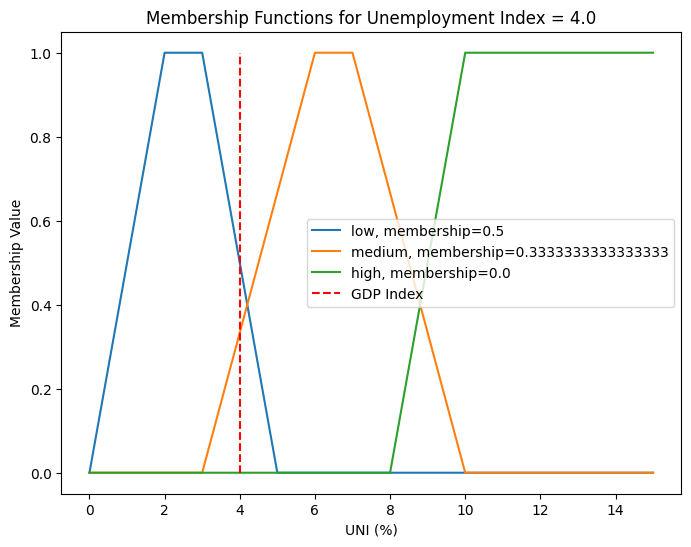

In [21]:
# Hiển thị hàm thành viên cho từng tập mờ của tỉ lệ thất nghiệp  
plt.figure(figsize=(8, 6))

# Hàm thành viên 'low'
unemp_membership_low = fuzz.interp_membership(unemp.universe, unemp['low'].mf, unemp_value)
plt.plot(unemp.universe, unemp['low'].mf, label = 'low, membership=' + str(unemp_membership_low))

# Hàm thành viên 'medium'
unemp_membership_medium = fuzz.interp_membership(unemp.universe, unemp['medium'].mf, unemp_value)
plt.plot(unemp.universe, unemp['medium'].mf, label = 'medium, membership=' + str(unemp_membership_medium))

# Hàm thành viên 'high'
unemp_membership_high = fuzz.interp_membership(unemp.universe, unemp['high'].mf, unemp_value)
plt.plot(unemp.universe, unemp['high'].mf, label = 'high, membership=' + str(unemp_membership_high))

# Đánh dấu vị trí chỉ số trên đồ thị
plt.vlines(x=unemp_value, ymin=0, ymax=1, color='r', linestyle='--', label='GDP Index')

plt.title(f'Membership Functions for Unemployment Index = {unemp_value}')
plt.xlabel('UNI (%)')
plt.ylabel('Membership Value')
plt.legend()
plt.show()

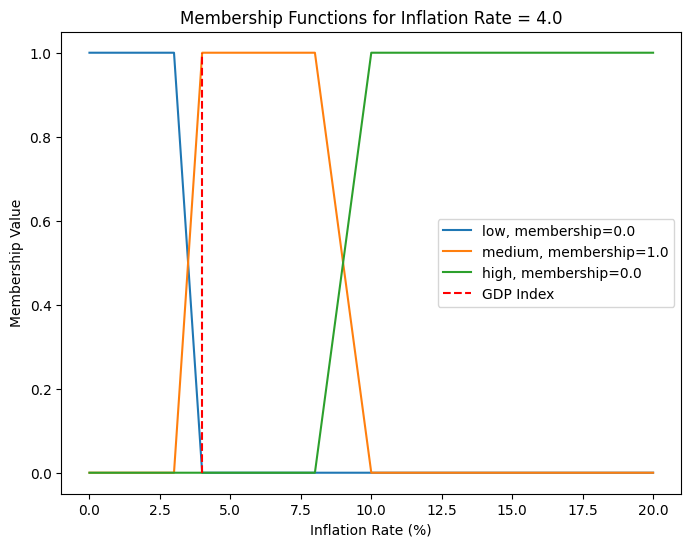

In [22]:
# Hiển thị hàm thành viên cho từng tập mờ của chỉ số lạm phát
plt.figure(figsize=(8, 6))

# Hàm thành viên 'low'
infla_membership_low = fuzz.interp_membership(infla.universe, infla['low'].mf, infla_value)
plt.plot(infla.universe, infla['low'].mf, label = 'low, membership=' + str(infla_membership_low))

# Hàm thành viên 'medium'
infla_membership_medium = fuzz.interp_membership(infla.universe, infla['medium'].mf, infla_value)
plt.plot(infla.universe, infla['medium'].mf, label = 'medium, membership=' + str(infla_membership_medium))

# Hàm thành viên 'high'
infla_membership_high = fuzz.interp_membership(infla.universe, infla['high'].mf, infla_value)
plt.plot(infla.universe, infla['high'].mf, label = 'high, membership=' + str(infla_membership_high))

# Đánh dấu vị trí chỉ số trên đồ thị
plt.vlines(x=infla_value, ymin=0, ymax=1, color='r', linestyle='--', label='GDP Index')

plt.title(f'Membership Functions for Inflation Rate = {infla_value}')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Membership Value')
plt.legend()
plt.show()

7.46927374301676


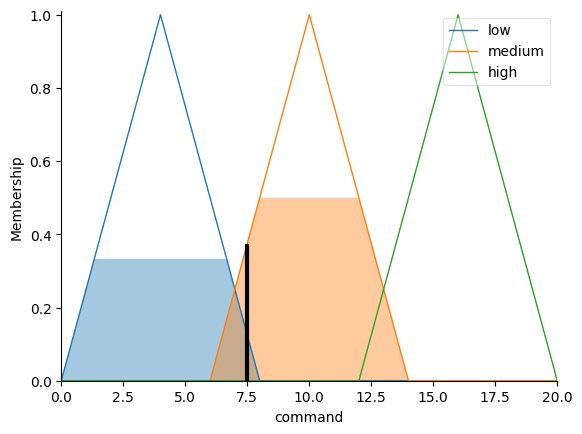

<Figure size 640x480 with 0 Axes>

In [28]:
print(cmd_output.output['command'])
# cmd.view(sim=cmd_output)

plt.show(cmd.view(sim=cmd_output))


c:\Users\TuanBao\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


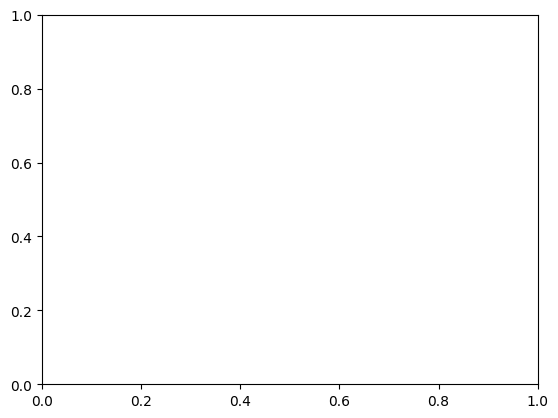

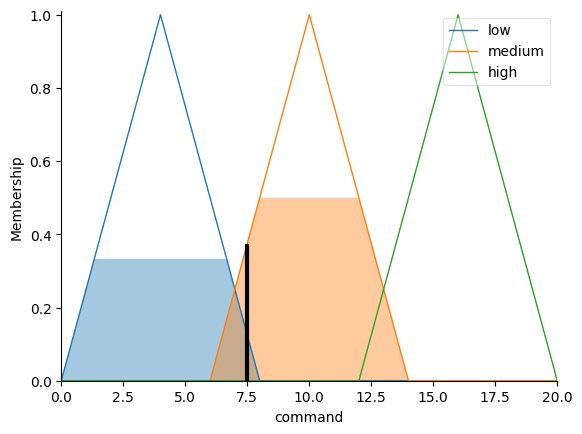

In [29]:
fig, ax = plt.subplots()
cmd.view(sim = cmd_output, ax=ax)
plt.close(fig)
plt.savefig('img.png')


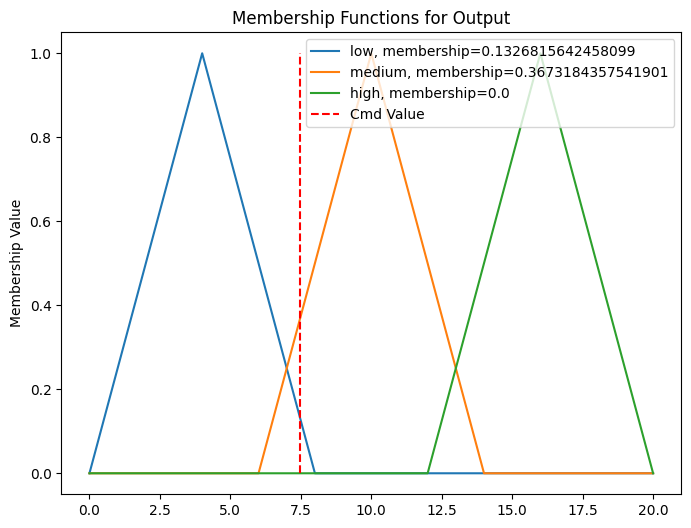

In [24]:
# plt.figure(figsize=(8, 6))

# membership_low = fuzz.interp_membership(cmd.universe, cmd['low'].mf, cmd_output.output['command'])
# plt.plot(cmd.universe, cmd['low'].mf, label = 'low, membership=' + str(membership_low))

# membership_medium = fuzz.interp_membership(cmd.universe, cmd['medium'].mf, cmd_output.output['command'])
# plt.plot(cmd.universe, cmd['medium'].mf, label = 'medium, membership=' + str(membership_medium))

# membership_high = fuzz.interp_membership(cmd.universe, cmd['high'].mf, cmd_output.output['command'])
# plt.plot(cmd.universe, cmd['high'].mf, label = 'high, membership=' + str(membership_high))

# # Đánh dấu vị trí chỉ số trên đồ thị
# plt.vlines(x=cmd_output.output['command'], ymin=0, ymax=1, color='r', linestyle='--', label='Cmd Value')

# plt.title(f'Membership Functions for Output')
# plt.xlabel('')
# plt.ylabel('Membership Value')
# plt.legend()
# plt.show()